## Clustering Algorithms Evaluation Criteria

### Data Generation

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
 n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Blobs with lables')

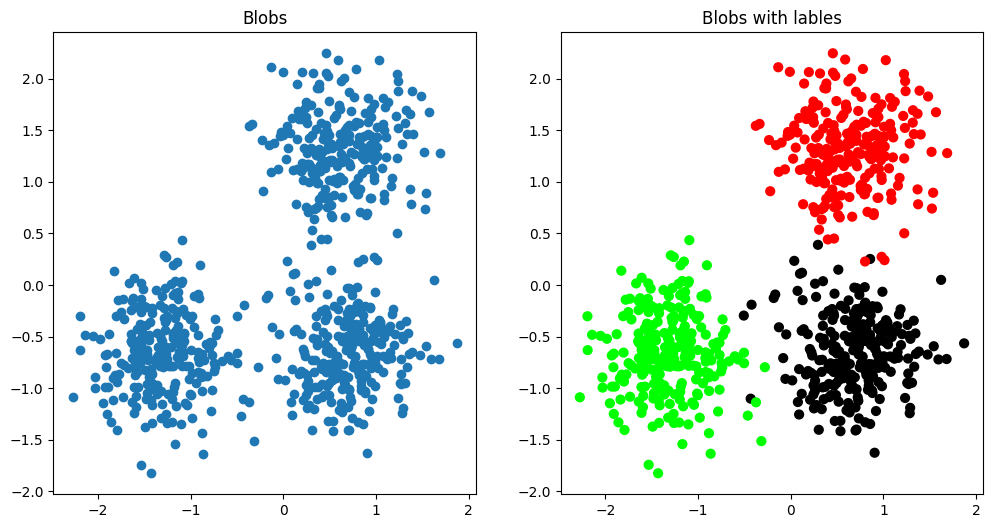

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

### Compute K-Means

In [19]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Use K = 3
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


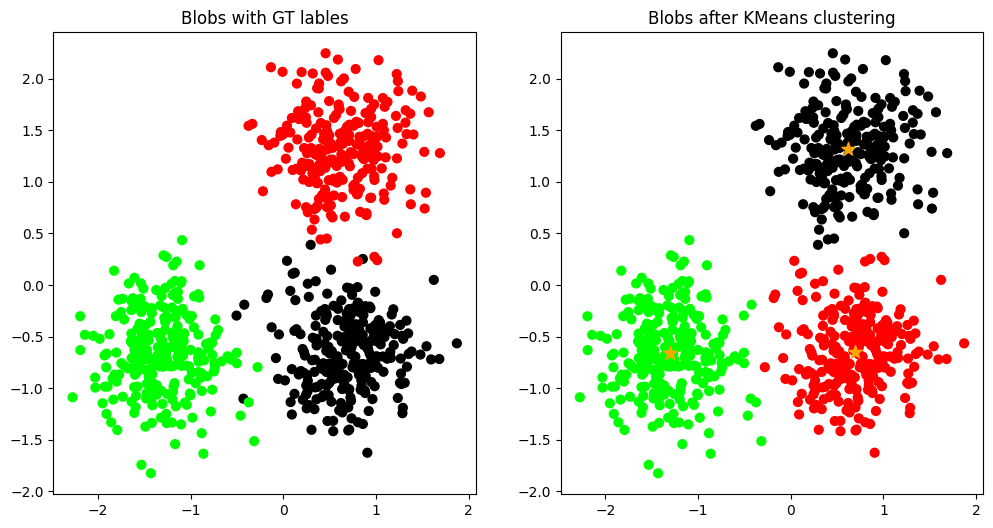

In [18]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')
# We will also get the coordinates of the cluster centers using KMeans.cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_
# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers
#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', c='orange',s=100)

### Compute DBSCAN

In [27]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Params for blobs data
# db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 12')

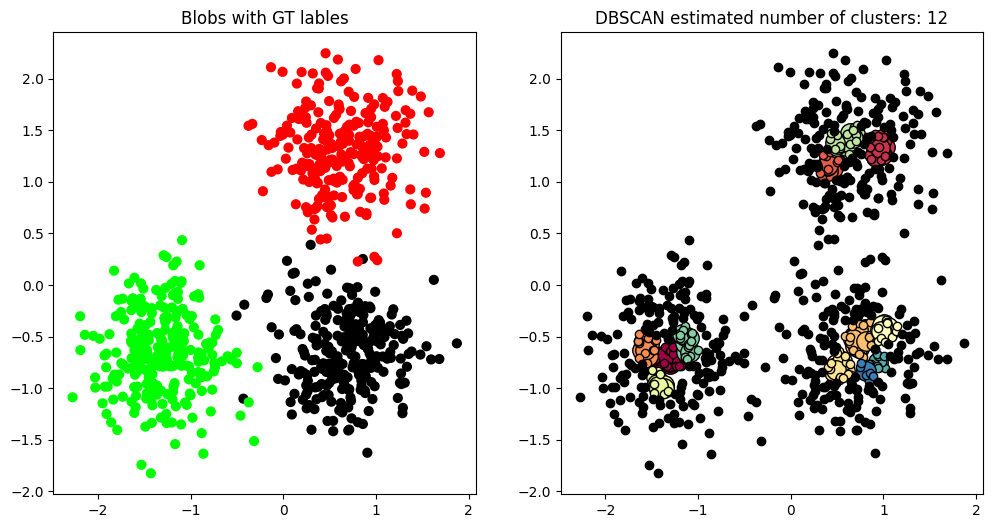

In [25]:
plt.figure(figsize=(12,6))
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size
plt.subplot(1,2,2)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
  if k == -1:
      # Black used for noise.
      col = [0, 0, 0, 1]
  class_member_mask = labels == k

  xy = X[class_member_mask & core_samples_mask]

  plt.plot(
    xy[:, 0],
    xy[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="k",
    markersize=14,
  )

  xy = X[class_member_mask & ~core_samples_mask]

  plt.plot(
    xy[:, 0],
    xy[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="k",
    markersize=6,
  )

plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

### Compute Gaussian Mixture Model (GMM)

In [10]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

Text(0.5, 1.0, 'Blobs after GMMs clustering')

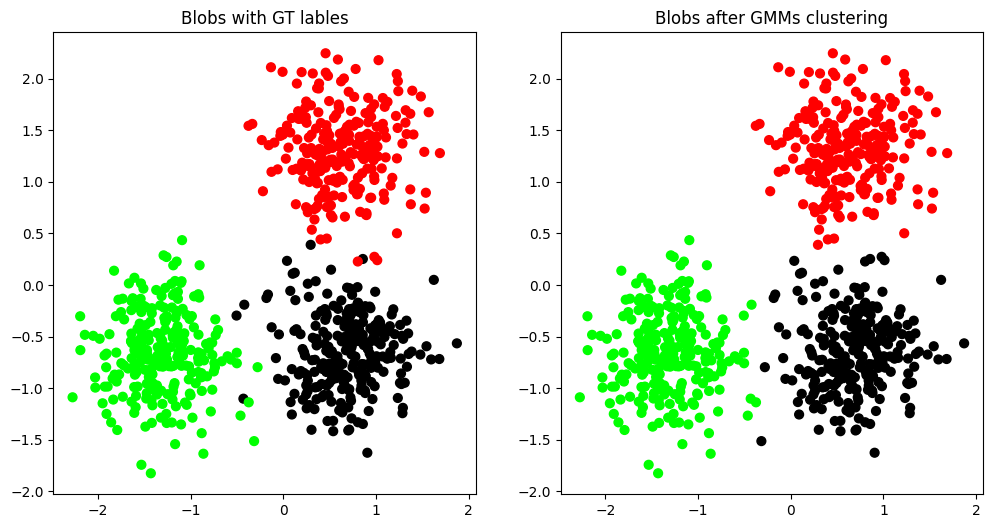

In [11]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Blobs after GMMs clustering')

## Quantitative results comparison of the cluster- ing methods using evaluation measures

In [28]:
print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print("Adjusted Mutual Information:"
 f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"\n---------------------------")
print(f"K-Means Evaluation measures\n")

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,predY):.3f}")
print(
"Adjusted Mutual Information:"
f" {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")
print(f"\n---------------------------")
print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true,y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, y_cluster_gmm):.3f}")
print(
"Adjusted Mutual Information:"
f" {metrics.adjusted_mutual_info_score(labels_true,y_cluster_gmm):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, y_cluster_gmm):.3f}")

---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626

---------------------------
K-Means Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------
GMMs Evaluation measures

Homogeneity: 0.939
Completeness: 0.939
V-measure: 0.939
Adjusted Rand Index: 0.964
Adjusted Mutual Information: 0.938
Silhouette Coefficient: 0.650


# TO-DO

## 1. Moons Dataset

In [18]:
from sklearn.datasets import make_moons
X, labels_true = make_moons(n_samples=500, noise=0.1)

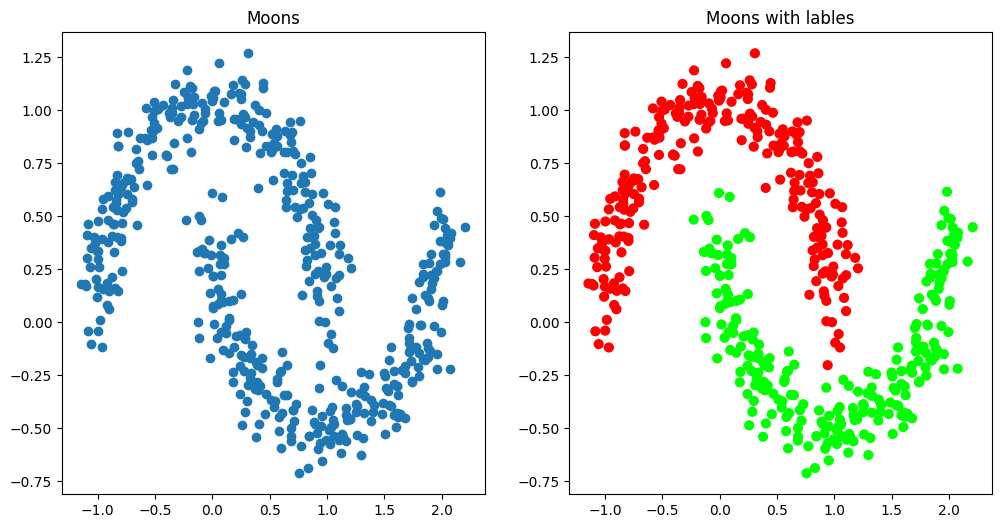

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Moons')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Moons with lables')
plt.show()

### Compute K-Means

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics # homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

moons_kmeans = []
kmeans_metrics = []
K_values = [2, 3, 5]

for K in K_values:
  model=KMeans(n_clusters=K)
  model.fit(X)
  predY=model.labels_
  moons_kmeans.append(predY)

  homogeneity = metrics.homogeneity_score(labels_true, predY)
  completeness = metrics.completeness_score(labels_true, predY)
  v_measure = metrics.v_measure_score(labels_true, predY)
  adjusted_rand = metrics.adjusted_rand_score(labels_true, predY)
  adjusted_mutual_info = metrics.adjusted_mutual_info_score(labels_true, predY)
  silhouette = metrics.silhouette_score(X, predY)

  kmeans_metrics.append([homogeneity, completeness, v_measure,
                  adjusted_rand, adjusted_mutual_info, silhouette])

kmeans_metrics_df = pd.DataFrame(kmeans_metrics, columns=[
    'Homogeneity', 'Completeness', 'V-measure',
    'Adjusted Rand Index', 'Adjusted Mutual Information',
    'Silhouette Coefficient'
], index=[f'K={K}' for K in K_values])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


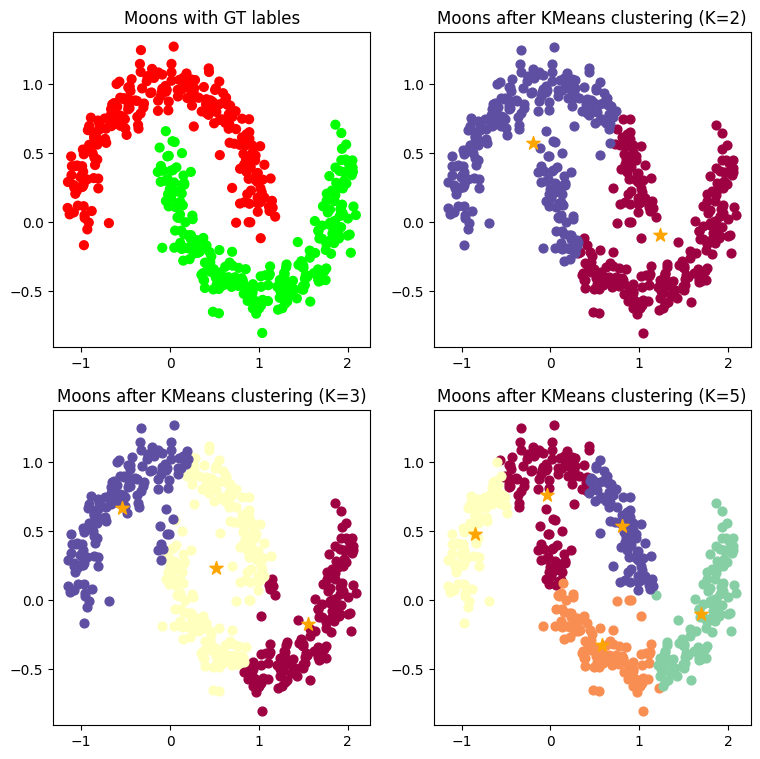

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def create_colormap(K):
    unique_labels = np.unique(range(K))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    return colors

plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Moons with GT lables')

for i, K in enumerate(K_values):
    colors = create_colormap(K)
    plt.subplot(2, 2, i + 2)
    for k, col in zip(range(K), colors):
        class_members = (moons_kmeans[i] == k)
        plt.scatter(X[class_members, 0], X[class_members, 1], c=[col], s=40, label=f'Cluster {k+1}')
    plt.title(f'Moons after KMeans clustering (K={K})')
    k_means_cluster_centers = KMeans(n_clusters=K).fit(X).cluster_centers_
    plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1], marker='*', c='orange', s=100)

plt.show()


It can be seen that regardless of what K is set to, the KMeans algorithm fails to properly cluster the moon dataset, because it works better for convex or spherical datasets, which the moon dataset isn't. Increasing the value of K quickly results in a form of overfitting, as can be seen with K=5.

### Compute DBSCAN

DBSCAN (eps=0.1)
Estimated number of clusters: 6
Estimated number of noise points: 47

DBSCAN (eps=0.15)
Estimated number of clusters: 2
Estimated number of noise points: 2

DBSCAN (eps=0.19)
Estimated number of clusters: 1
Estimated number of noise points: 1



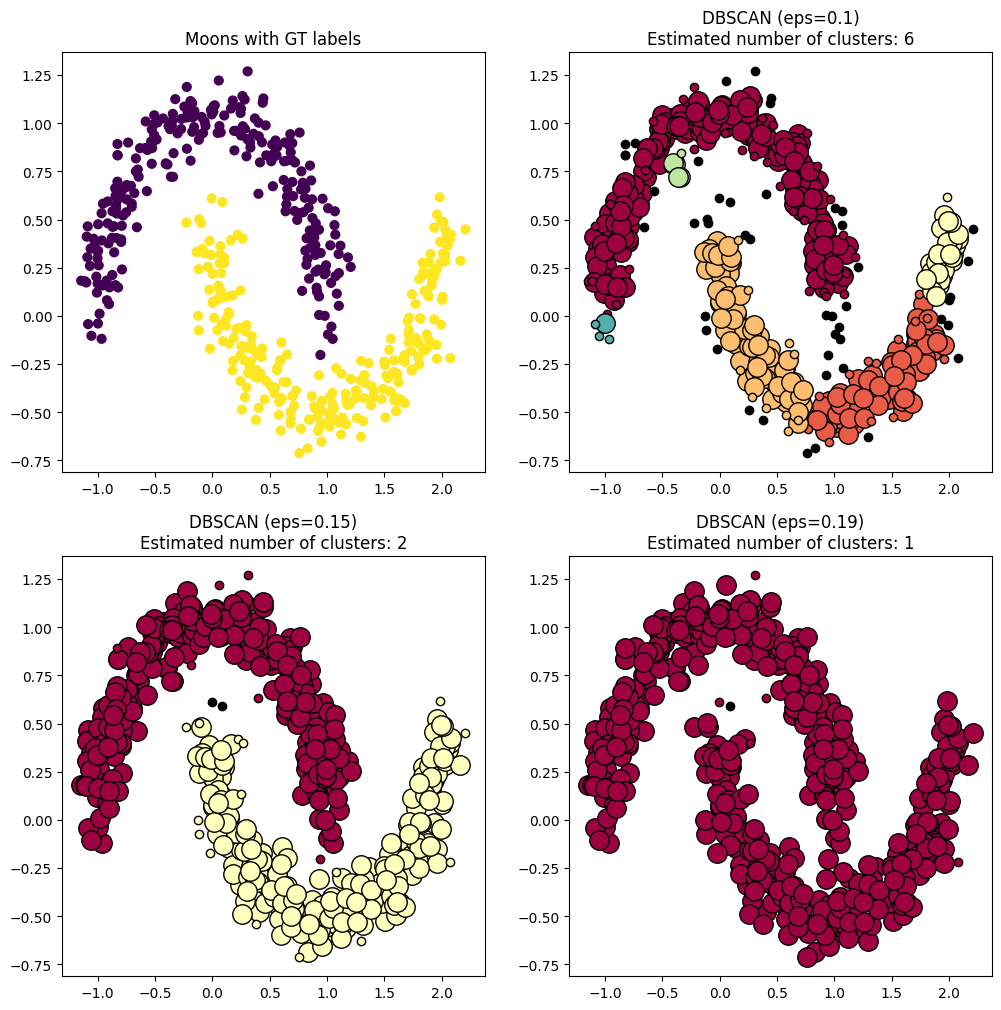

In [8]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_true, s=40)
plt.title('Moons with GT labels')

eps_values = [0.1, 0.15, 0.19]
dbscan_results = []
dbscan_metrics = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5).fit(X)
    labels = db.labels_
    dbscan_results.append(labels)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(f"DBSCAN (eps={eps})")
    print(f"Estimated number of clusters: {n_clusters_}")
    print(f"Estimated number of noise points: {n_noise_}\n")

    homogeneity = metrics.homogeneity_score(labels_true, labels)
    completeness = metrics.completeness_score(labels_true, labels)
    v_measure = metrics.v_measure_score(labels_true, labels)
    adjusted_rand = metrics.adjusted_rand_score(labels_true, labels)
    adjusted_mutual_info = metrics.adjusted_mutual_info_score(labels_true, labels)
    silhouette = metrics.silhouette_score(X, labels)

    dbscan_metrics.append([homogeneity, completeness, v_measure,
                  adjusted_rand, adjusted_mutual_info, silhouette])

dbscan_metrics_df = pd.DataFrame(dbscan_metrics, columns=[
    'Homogeneity', 'Completeness', 'V-measure',
    'Adjusted Rand Index', 'Adjusted Mutual Information',
    'Silhouette Coefficient'
], index=[f'eps={eps}' for eps in eps_values])


for i, eps in enumerate(eps_values):
    labels = dbscan_results[i]
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[DBSCAN(eps=eps, min_samples=5).fit(X).core_sample_indices_] = True
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.subplot(2, 2, i + 2)
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

    plt.title(f"DBSCAN (eps={eps})\nEstimated number of clusters: {n_clusters_}")

plt.show()


It is evident how sensitive the epsilon parameter is. **Smaller** eps values (like 0.1) lead to over-segmentation, where the algorithm identifies too many small clusters and noise points. **Moderate** eps values (like 0.15) are optimal, capturing the natural cluster structure without over-segmentation or under-segmentation. **Larger** eps values (like 0.19) lead to under-segmentation, where the algorithm merges distinct clusters into a single cluster.

This shows how DBSCAN is a good choice for datasets with clusters of arbitrary shape like this one.

### Compute Gaussian Mixture Model (GMM)

In [21]:
from sklearn.mixture import GaussianMixture

n_components_values = [2, 3, 4]
gmm_results = []
gmm_metrics = []

for n_components in n_components_values:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    y_cluster_gmm = gmm.predict(X)
    gmm_results.append(y_cluster_gmm)

    homogeneity = metrics.homogeneity_score(labels_true, y_cluster_gmm)
    completeness = metrics.completeness_score(labels_true, y_cluster_gmm)
    v_measure = metrics.v_measure_score(labels_true, y_cluster_gmm)
    adjusted_rand = metrics.adjusted_rand_score(labels_true, y_cluster_gmm)
    adjusted_mutual_info = metrics.adjusted_mutual_info_score(labels_true, y_cluster_gmm)
    silhouette = metrics.silhouette_score(X, y_cluster_gmm)

    gmm_metrics.append([homogeneity, completeness, v_measure,
                  adjusted_rand, adjusted_mutual_info, silhouette])

gmm_metrics_df = pd.DataFrame(gmm_metrics, columns=[
    'Homogeneity', 'Completeness', 'V-measure',
    'Adjusted Rand Index', 'Adjusted Mutual Information',
    'Silhouette Coefficient'
], index=[f'n_components={n}' for n in n_components_values])

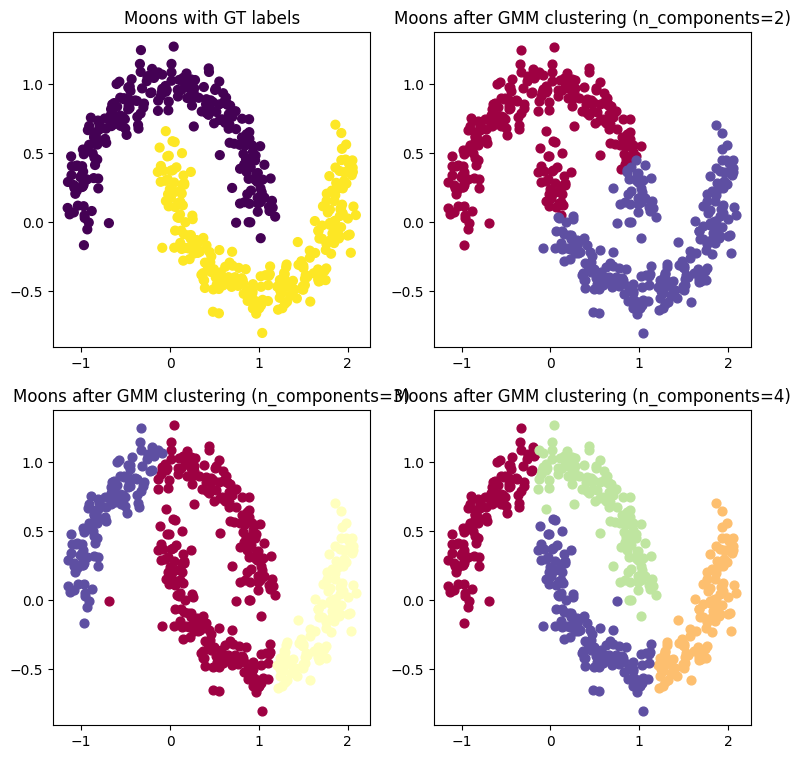

In [22]:
def create_colormap(K):
    unique_labels = np.unique(range(K))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    return colors

plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_true, s=40)
plt.title('Moons with GT labels')

for i, n_components in enumerate(n_components_values):
    y_cluster_gmm = gmm_results[i]
    unique_labels = np.unique(y_cluster_gmm)
    colors = create_colormap(len(unique_labels))

    plt.subplot(2, 2, i + 2)
    for k, col in zip(unique_labels, colors):
        class_members = (y_cluster_gmm == k)
        plt.scatter(X[class_members, 0], X[class_members, 1], c=[col], s=40, label=f'Cluster {k+1}')

    plt.title(f'Moons after GMM clustering (n_components={n_components})')

plt.show()

Since the data doesn't have the shape of a Gaussian distribution, the GMM algorithm captured 2 clusters somewhat accurate to the original, but increasing the number of clusters to 3+ results in over-segmentation, losing the original two moon clusters.

### Quantitative results comparison of the cluster- ing methods using evaluation measures

In [27]:
print('KMeans Metrics:\n', kmeans_metrics_df.to_string())
print(f"\n---------------------------")
print('\nDBSCAN Metrics:\n', dbscan_metrics_df.to_string())
print(f"\n---------------------------")
print('\nGMM Metrics:\n', gmm_metrics_df.to_string())

KMeans Metrics:
      Homogeneity  Completeness  V-measure  Adjusted Rand Index  Adjusted Mutual Information  Silhouette Coefficient
K=2     0.191970      0.192006   0.191988             0.252518                     0.190817                0.483616
K=3     0.397310      0.253439   0.309471             0.268469                     0.307909                0.421990
K=5     0.750373      0.326046   0.454574             0.312643                     0.452649                0.466299

---------------------------

DBSCAN Metrics:
           Homogeneity  Completeness  V-measure  Adjusted Rand Index  Adjusted Mutual Information  Silhouette Coefficient
eps=0.1      0.906031      0.421348   0.575200             0.533591                 5.727039e-01                0.014136
eps=0.15     1.000000      0.967482   0.983472             0.992048                 9.834161e-01               -0.034163
eps=0.19     0.002003      0.096228   0.003924             0.000000                -3.790412e-16             

- **KMeans**
  - K=2: Has a moderate silhouette coefficient but low homogeneity and completeness.
  - K=3: Shows slight improvement in homogeneity and V-measure but a slight drop in silhouette coefficient.
  - K=5: Has the highest homogeneity, V-measure, adjusted mutual information, and a reasonably high silhouette coefficient.
<br/>

- **DBSCAN**
  - eps=0.1: Shows high homogeneity but a very low silhouette coefficient.
  - eps=0.15: Has perfect homogeneity and very high completeness and adjusted metrics but a negative silhouette coefficient.
  - eps=0.19: Performs poorly on all metrics except homogeneity.
<br/>

- **GMM**
  - n_components=2: Moderate performance across all metrics.
  - n_components=3: Slight improvement in homogeneity but lower completeness.
  - n_components=4: Shows significant improvement in homogeneity and V-measure but a slight drop in silhouette coefficient

Based on the above metrics, we can determine that DBSCAN with eps=0.15 is almost perfect for clustering on the moon dataset.

## 2. KMeans vs. KMedoids

In [2]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


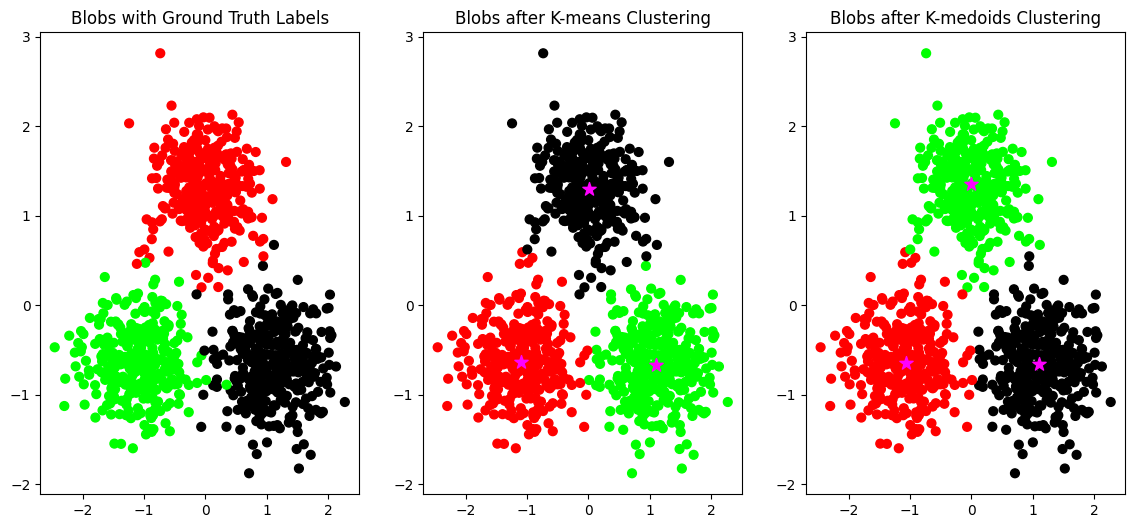

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Generate the blobs dataset
centers = [[0, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.4, random_state=1)
X = StandardScaler().fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
predY_kmeans = np.choose(kmeans.labels_, [0, 1, 2]).astype(np.int64)
k_means_cluster_centers = kmeans.cluster_centers_

# K-medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit(X)
predY_kmedoids = np.choose(kmedoids.labels_, [0, 1, 2]).astype(np.int64)
k_medoids_cluster_centers = kmedoids.cluster_centers_

# Plotting
plt.figure(figsize=(14, 6))
colormap = np.array(['red', 'lime', 'black'])

# Plot the blobs with ground truth labels
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true], s=40)
plt.title('Blobs with Ground Truth Labels')

# Plot the blobs after K-means clustering
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY_kmeans], s=40)
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1], marker='*', c='magenta', s=100)
plt.title('Blobs after K-means Clustering')

# Plot the blobs after K-medoids clustering
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY_kmedoids], s=40)
plt.scatter(k_medoids_cluster_centers[:, 0], k_medoids_cluster_centers[:, 1], marker='*', c='magenta', s=100)
plt.title('Blobs after K-medoids Clustering')

plt.show()


Some of the key differences between both algorithms is that the KMedoids centers are actual data points, whereas the KMeans centers are means. Which explains why the centers are almost the same but seem shifted a bit in KMedoids. Also, both algorithms differ in how they treat outliers in each cluster.

In [8]:
from sklearn import metrics

for i, predY in enumerate([predY_kmeans, predY_kmedoids]):
  if i == 0:
    print(f"K-Means Evaluation measures\n")
  else:
    print(f"\n---------------------------")
    print(f"\nK-Medoids Evaluation measures\n")
  print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
  print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
  print(f"Completeness: {metrics.completeness_score(labels_true, predY):.3f}")
  print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
  print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, predY):.3f}")
  print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}")
  print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")



K-Means Evaluation measures

Homogeneity: 0.947
Homogeneity: 0.947
Completeness: 0.947
V-measure: 0.947
Adjusted Rand Index: 0.970
Adjusted Mutual Information: 0.946
Silhouette Coefficient: 0.641

---------------------------

K-Medoids Evaluation measures

Homogeneity: 0.946
Homogeneity: 0.946
Completeness: 0.946
V-measure: 0.946
Adjusted Rand Index: 0.970
Adjusted Mutual Information: 0.946
Silhouette Coefficient: 0.641


Based on the above metrics, the perfomance of both algorithms is almost identical.

## 3. Image Segmentation

(150, 120, 3)


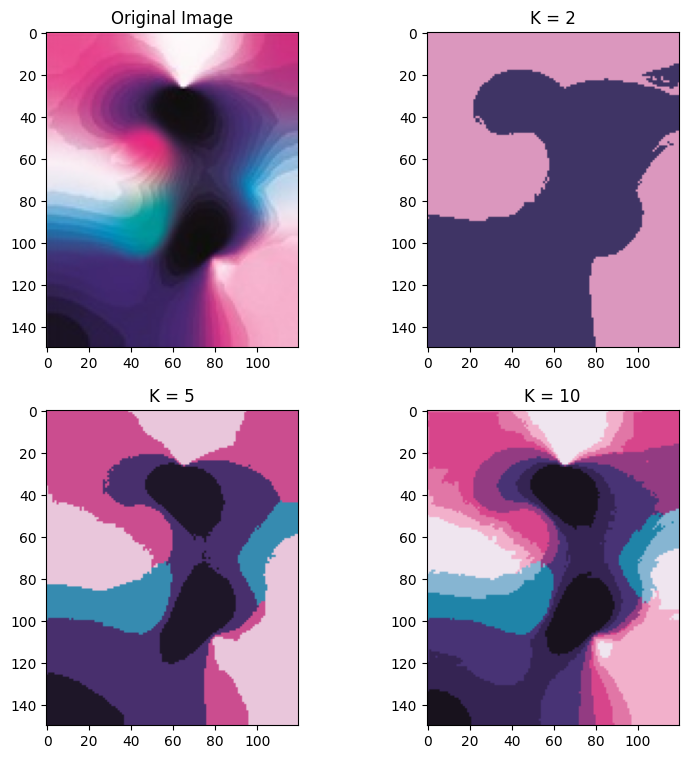

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = mpl.image.imread("./image2.jpg")
print(image.shape)

X = image.reshape(-1, 3)

def segment_image(image, K):
    X = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=K, n_init=10)
    kmeans.fit(X)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

K_values = [2, 5, 10]
segmented_images = [segment_image(image, K) for K in K_values]

plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')

for i, K in enumerate(K_values):
    plt.subplot(2, 2, i+2)
    plt.imshow(segmented_images[i] / 255)
    plt.title(f'K = {K}')

plt.show()

- Using K=2, the algorithm divided the image into two clusters, making it heavily simplified. These two clusters are the lightest and darkest areas since these shades are most dominant.

- Using K=5, the algoirthm further divided the image into more clusters based on the most dominant colors, meaning it's starting to gain a bit more complexity and balance.

- Using K=10, the algorithm now has a lot more complexity with 10 clusters, dividing the image into colors and shades as well, which looks closer to the original image but with a bit of simplification.

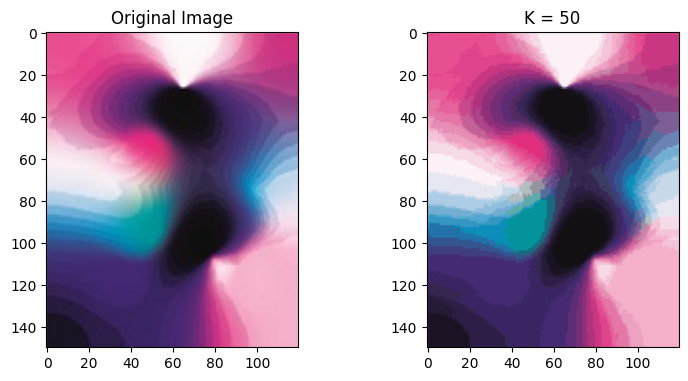

In [17]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=50, n_init=10)
kmeans.fit(X)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(segmented_image / 255)
plt.title(f'K = 50')
plt.show()

With K=50, the algorithm has reached much higher complexity and detail than the previous versions, appearing closer to the original image.